In [2]:
import sys, os
sys.path.insert(0,"/home/zhi/SULI21")
import quasim as qua
import numpy as np
#import pandas as pd

import matplotlib.pyplot as plt

In [3]:
QT = qua.QuaTel()
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")
#Output as [[star_num1,RA1,DEC1,S1],[star_num2,RA2,DEC2,S2],....] 
#in rad and Jy, S is in V-band
BSC.pos_s.shape

(9096, 4)

In [4]:
lam = 0.55*10**(-6)

#A bunch of telescope positions
#[RA,DEC,RADIUS] in rad and meter
pos_t_EW = [[-1.3,0.1,6.4*10**(6)],[-1.30003,0.1,6.39995*10**(6)]]   #SEPARATED BY E-W
pos_t_NS = [[-1.3,0.1,6.4*10**(6)],[-1.3,0.10003,6.40002*10**(6)]]
pos_t_SE = [[-1.3,0.1,6.4*10**(6)],[-1.30002,0.10002,6.399977*10**(6)]]

#NEW YORK COORD but the overall baseline is E-W, with B ~ 270m
pos_t_NY = [[-1.3,0.71,6.0*10**(6)],[-1.300016,0.7099713,6.0002*10**(6)]]  
 
#[RA,DEC,S] in rad and Jy for flux density
pos = BSC.BSC_filter(pos_t_NY)
print(pos.shape)
T = 10.0  #Period of observation[sec]


(19, 2, 4)


In [5]:
num, t, baseline = QT.get_num_photon(pos,pos_t_NY,lam,T,'pos')

In [7]:
#pos[1:]
print(baseline)

[ 4.44394900e-01 -2.73777510e+02 -2.29124601e-01]


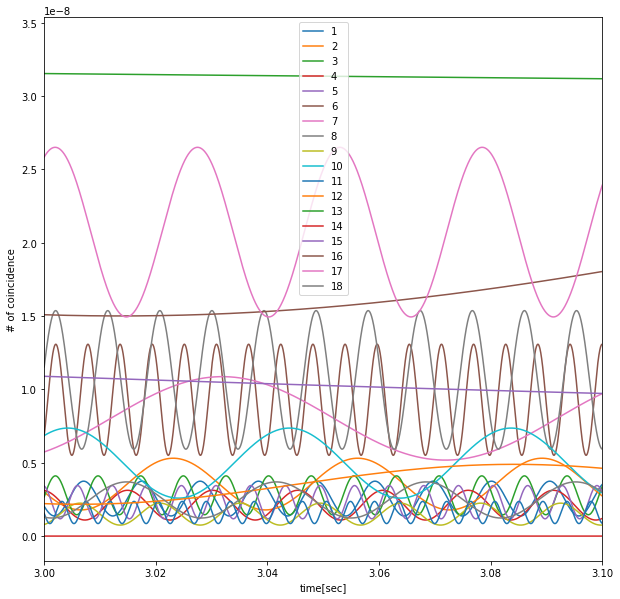

In [6]:
N = t.size
plt.figure(figsize=(10,10))
plt.xlim([3.0,3.1])
for i in range(18):
    j=i+1
    plt.plot(t[N/4:N/2],num[j,N/4:N/2],label= j)
    
plt.xlabel('time[sec]');plt.ylabel('# of coincidence')
plt.legend()

#There is one shows 0 number of coincidence because its current position is outside of 
# telescope plane. Need longer period of observation so Earth is rotated by sufficiently.